# How to extract 3D structure of the nebulae from the LVM data simulator

1. Initialize the LVM Field

In [42]:
import os
from lvmdatasimulator.field import LVMField
import astropy.units as u
import astropy.table as Table
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
#os.chdir('/Users/mors/Science/LVM/Simulator_example/')  # Your top-level working directory
os.chdir('/home/amrita/LVM/lvmnebular/')

In [43]:
#Some random of the LVM Field
'''
ra = 12.34 # u.degree
dec = -20.35 # u.degree
fov_size = 35 # u.arcmin
fov_pixel = 1 # u.arcsec
distance = 50 # * u.kpc
sys_vel = 0 #* u.km / u.s
turbulent_sigma = 20 #* u.km / u.s
preserve_kinematics = False
'''
#specifing parameters
ra = 90.5625 # u.degree
dec = 4.998333 # u.degree
fov_size = 10 # u.arcmin
fov_pixel = 5 # u.arcsec
distance = 16.0 * u.kpc
sys_vel = 20 #* u.km / u.s
turbulent_sigma = 15 #* u.km / u.s
preserve_kinematics = False

unit_ra = u.degree
unit_dec = u.degree
unit_size = u.arcmin
unit_pixel = u.arcsec

name = 'LVM_extract3D'
my_lvmfield = LVMField(ra=ra, dec=dec, size=fov_size, pxsize=fov_pixel, name=name,
                       unit_ra=unit_ra, unit_dec=unit_dec, unit_size=unit_size, unit_pxsize=unit_pixel,
                       ism_params={'distance': distance, 'sys_velocity': sys_vel, 'turbulent_sigma': turbulent_sigma,
                                   'preserve_kinematics': preserve_kinematics})

2. Define the properties of the nebula to be simulated
Let's simulate only a Bubble in our FOV

In [44]:
'''
my_nebulae = [{'type': 'Bubble3D',
               'max_brightness': 1.e-14,
               'thickness': 0.85,
               'radius': 10*u.pc,
               'expansion_velocity': 15,
                'turbulent_sigma': 15,
                'sys_velocity': 0,
               'model_params': {'Z': 0.6, 'qH': 50, 'nH': 100, 'Geometry': 'Cloud', 'Teff': 35000.},
               'model_type': 'cloudy',
               'offset_RA':0,
               'offset_DEC':-20},
              ]
'''
my_nebulae = [{'type': 'Bubble3D',
               'max_brightness': 5e-14,
               'thickness': 0.8,
               'radius': 18*u.pc,
               'expansion_velocity': 10,
                'turbulent_sigma': 15,
                'sys_velocity': 10,
               'model_params': {'Z': 1.0, 'qH': 50., 'nH': 100, 'Geometry': 'Shell', 'Teff': 40000.},
               'model_type': 'cloudy',
               'offset_RA':0,
               'offset_DEC':0},
              ]

3. Add this nebula to the LVM Field

In [45]:
my_lvmfield.add_nebulae(my_nebulae)

[INFO]: Start generating 1 nebulae
[WARNING]: Use the closest pre-computed model with id = Shell_921. Its parameters: Geometry = Shell; Z = 1.0; qH = 50.0; LogLsun = 6.5; Teff = 30000.0; nH = 100.0; 


4. Perfect! Now you have access to all the properties of the nebulae considered in the simulator.

In [46]:
print(my_lvmfield.ism.nebulae_objects[0].max_brightness)
print(my_lvmfield.ism.nebulae_objects[0].thickness)
print(my_lvmfield.ism.nebulae_objects[0].radius)
print(my_lvmfield.ism.nebulae_objects[0].expansion_velocity)


5e-14 erg / (s arcsec2 cm2)
0.8
18.0 pc
10.0 km / s


One access the relative 3D brightness distribution in cartesian or in spherical coordinates.

In [47]:
print(my_lvmfield.ism.nebulae_objects[0]._brightness_3d_cartesian.shape)  # nz, ny, nx, where nx is along line-of-sight
print(my_lvmfield.ism.nebulae_objects[0]._brightness_3d_spherical.shape)  # rad, theta, phi

print(np.mean(my_lvmfield.ism.nebulae_objects[0]._brightness_4d_cartesian) )
print(np.max(my_lvmfield.ism.nebulae_objects[0]._brightness_4d_cartesian) )
print(np.min(my_lvmfield.ism.nebulae_objects[0]._brightness_4d_cartesian) )

c3D=my_lvmfield.ism.nebulae_objects[0]._brightness_3d_cartesian #
print(c3D[10, 20, 30]) #considering uniform brightness in each shell=1 (default)


(97, 97, 100)
(140, 90, 90)
9.664002203820301e-09
1.546234708372462e-06
-3.352977150609534e-08
0.0


In [85]:
print(my_lvmfield.ism.nebulae_objects[0]._cartesian_x_grid)  # this one is along line-of-sight
print(my_lvmfield.ism.nebulae_objects[0]._cartesian_y_grid)
print(my_lvmfield.ism.nebulae_objects[0]._cartesian_z_grid.shape, my_lvmfield.ism.nebulae_objects[0]._cartesian_x_grid.shape)


[-18.36       -17.98909091 -17.61818182 -17.24727273 -16.87636364
 -16.50545455 -16.13454545 -15.76363636 -15.39272727 -15.02181818
 -14.65090909 -14.28       -13.90909091 -13.53818182 -13.16727273
 -12.79636364 -12.42545455 -12.05454545 -11.68363636 -11.31272727
 -10.94181818 -10.57090909 -10.2         -9.82909091  -9.45818182
  -9.08727273  -8.71636364  -8.34545455  -7.97454545  -7.60363636
  -7.23272727  -6.86181818  -6.49090909  -6.12        -5.74909091
  -5.37818182  -5.00727273  -4.63636364  -4.26545455  -3.89454545
  -3.52363636  -3.15272727  -2.78181818  -2.41090909  -2.04
  -1.66909091  -1.29818182  -0.92727273  -0.55636364  -0.18545455
   0.18545455   0.55636364   0.92727273   1.29818182   1.66909091
   2.04         2.41090909   2.78181818   3.15272727   3.52363636
   3.89454545   4.26545455   4.63636364   5.00727273   5.37818182
   5.74909091   6.12         6.49090909   6.86181818   7.23272727
   7.60363636   7.97454545   8.34545455   8.71636364   9.08727273
   9.45818182   

In [49]:
simname = 'Bubble_v2_5e-14'
with fits.open('/home/amrita/LVM/lvmnebular/'+simname+'/'+simname+' diag_Temp_Den.fits') as hdu:
        Te = hdu[1].data

In [50]:
#Radius:0, 'Te':1, 'ne':2, 'H+':3, 'O0':4, 'O+':5, 'O++':6, 'N0':7, 'N+':8, 'N++':9, 'S0':10, 'S+':11, 'S++:12
#line = np.array([9532, 9069, 7319, 7320, 7330, 7331, 6731, 6716, 6584, 6548, 6312, 5755, 5007, 4959, 4363, 4069, 4076, 3729, 3726])


In [51]:
my_lvmfield.ism.nebulae_objects[0]._theta_grid
print(my_lvmfield.ism.nebulae_objects[0]._rad_grid.shape)
my_lvmfield.ism.nebulae_objects[0]._phi_grid

(140,)


array([0.        , 0.07059759, 0.14119518, 0.21179276, 0.28239035,
       0.35298794, 0.42358553, 0.49418311, 0.5647807 , 0.63537829,
       0.70597588, 0.77657346, 0.84717105, 0.91776864, 0.98836623,
       1.05896382, 1.1295614 , 1.20015899, 1.27075658, 1.34135417,
       1.41195175, 1.48254934, 1.55314693, 1.62374452, 1.69434211,
       1.76493969, 1.83553728, 1.90613487, 1.97673246, 2.04733004,
       2.11792763, 2.18852522, 2.25912281, 2.32972039, 2.40031798,
       2.47091557, 2.54151316, 2.61211075, 2.68270833, 2.75330592,
       2.82390351, 2.8945011 , 2.96509868, 3.03569627, 3.10629386,
       3.17689145, 3.24748904, 3.31808662, 3.38868421, 3.4592818 ,
       3.52987939, 3.60047697, 3.67107456, 3.74167215, 3.81226974,
       3.88286732, 3.95346491, 4.0240625 , 4.09466009, 4.16525768,
       4.23585526, 4.30645285, 4.37705044, 4.44764803, 4.51824561,
       4.5888432 , 4.65944079, 4.73003838, 4.80063597, 4.87123355,
       4.94183114, 5.01242873, 5.08302632, 5.1536239 , 5.22422

Similar for 4D, where first dimension is a line ID

In [52]:
print(my_lvmfield.ism.nebulae_objects[0]._brightness_4d_cartesian.shape)
print(my_lvmfield.ism.nebulae_objects[0]._brightness_4d_spherical.shape)

#print(my_lvmfield.ism.nebulae_objects[0]._brightness_4d_cartesian)
#print(my_lvmfield.ism.nebulae_objects[0]._brightness_4d_spherical)

#ind5007=100
#my_lvmfield.ism.nebulae_objects[0]._brightness_4d_cartesian[ind5007,:,:,:]=pertemcube

(141, 97, 97, 100)
(141, 140, 90, 90)


In [53]:
hdu1=fits.PrimaryHDU(my_lvmfield.ism.nebulae_objects[0]._brightness_3d_cartesian)
hdul1=fits.HDUList([hdu1])
hdul1.writeto('./Perturbation/cube_3D_cart.fits', overwrite=True)

In [54]:
hdu=fits.PrimaryHDU(my_lvmfield.ism.nebulae_objects[0]._brightness_4d_spherical)
hdul=fits.HDUList([hdu])
hdul.writeto('./Perturbation/cube_sph.fits', overwrite=True) #storing 4D cube in fits format (spherical coordinate)

In [55]:
hdu1=fits.PrimaryHDU(my_lvmfield.ism.nebulae_objects[0]._brightness_4d_cartesian)
hdul1=fits.HDUList([hdu1])

hdul1.writeto('./Perturbation/cube_4D_cart.fits', overwrite=True)

In [56]:
hdu1=fits.PrimaryHDU(my_lvmfield.ism.nebulae_objects[0].wl_list)
hdul1=fits.HDUList([hdu1])

hdul1.writeto('./Perturbation/lines_from_4Dcube.fits', overwrite=True)

for i, lines in enumerate(my_lvmfield.ism.nebulae_objects[0].wl_list):

    print(i, lines)


0 3613.64
1 3634.08
2 3669.46
3 3671.47
4 3673.75
5 3676.36
6 3679.35
7 3682.8
8 3686.83
9 3691.55
10 3697.15
11 3703.85
12 3704.76
13 3711.97
14 3721.63
15 3721.93
16 3726.03
17 3728.81
18 3734.36
19 3750.15
20 3770.63
21 3797.89
22 3819.61
23 3833.48
24 3835.38
25 3868.76
26 3871.69
27 3888.63
28 3889.05
29 3926.41
30 3933.66
31 3964.73
32 3967.47
33 3970.07
34 4009.05
35 4026.2
36 4068.6
37 4076.35
38 4101.73
39 4120.82
40 4143.76
41 4243.97
42 4287.39
43 4340.46
44 4359.33
45 4363.21
46 4387.93
47 4413.78
48 4416.27
49 4471.49
50 4562.6
51 4571.1
52 4607.11
53 4658.01
54 4666.94
55 4685.64
56 4701.62
57 4711.26
58 4713.03
59 4733.84
60 4740.12
61 4754.64
62 4769.52
63 4777.61
64 4814.53
65 4861.33
66 4881.12
67 4889.62
68 4921.93
69 4924.66
70 4958.91
71 4987.33
72 5006.84
73 5011.16
74 5015.68
75 5047.64
76 5084.66
77 5158.78
78 5197.9
79 5200.26
80 5261.62
81 5270.4
82 5273.35
83 5411.98
84 5517.71
85 5537.87
86 5754.61
87 5875.64
88 6300.3
89 6312.06
90 6363.78
91 6548.05
92 656

In [57]:
'''
9532, 9069, 7319, 7320, 7330, 7331, 6731, 6716, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726
138,  132,  101,  102,  103,  104,   96,   95,   95,   93,   92,   91,   89,   86,   72,   70,   65,    45,   36,   37,   33,   17,   16 
'''

'\n9532, 9069, 7319, 7320, 7330, 7331, 6731, 6716, 6717, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726\n138,  132,  101,  102,  103,  104,   96,   95,   95,   93,   92,   91,   89,   86,   72,   70,   65,    45,   36,   37,   33,   17,   16 \n'

In [58]:
#dir(my_lvmfield.ism.nebulae_objects[0])

In [112]:
def cooling_func(wavelength, lineid, den):

    simname = 'Bubble_v2_1e-8'

    with fits.open('/home/amrita/LVM/lvmnebular/'+simname+'/testneb_tutorial3_ex1.fits') as hdu:
        vals=hdu['Comp_0_PhysParams'].data
    
    #den = np.array([vals[12], vals[12], vals[5], vals[5], vals[5], vals[5], vals[11], vals[11], vals[8], vals[8], vals[12], vals[8], vals[6],
    #vals[6], vals[6], vals[11], vals[11], vals[5],vals[5]])

    with fits.open('./Perturbation/cube_4D_cart.fits') as hdul:
         data=hdul[0].data
         header = hdul[0].header

    x1 = my_lvmfield.ism.nebulae_objects[0]._cartesian_x_grid
    y1 = my_lvmfield.ism.nebulae_objects[0]._cartesian_y_grid
    z1 = my_lvmfield.ism.nebulae_objects[0]._cartesian_z_grid

    plt.rcParams.update({'axes.titlesize': 'large',
                 'axes.labelsize':'large',
                 'axes.linewidth':     '1.8' ,
                 'ytick.labelsize': 'large',
                 'xtick.labelsize': 'large',
                 'font.size': '12.0',
                 'legend.fontsize':'large'})
            
    x = np.linspace(0, np.max(x1), 100)
    y = np.linspace(0, np.max(y1), 100)
    z = np.linspace(0, np.max(z1), 100)

    chi = 6.626e-24*299792458*1e7/wavelength                                                             #in ergs

    fig, ax = plt.subplots(figsize = (8,5))
    
    rad = np.sqrt(x.value**2 + y.value**2 + z.value**2)
 
    cooling_results = np.zeros(rad.shape)

    for i, j, k in zip(x, y, z):

        #for j, lim in enumerate (y):
        #    
        #    for k, lim2 in enumerate(z):

        radius = np.sqrt(i**2 + j**2 + k**2)
        print(i, j, k, radius)

        if j == 9.59048708303308:
            sel = i>=0
        #for d in den:

            cooling_value = data[lineid, :, j, j] * chi / den                   #calculating cooling = emissivity * h*c/(wavelength * relative ionic abundance)
            cooling_results = cooling_value[sel]
    
    print(np.min(cooling_results), np.max(cooling_results), cooling_results, cooling_results.shape)

    ax.plot(rad, cooling_results)

    ax.set_xlabel('Radius (pc)')
    ax.set_ylabel('cooling_'+str(wavelength))
    ax.set_ylim(1e-10, 1e-6)
    plt.savefig('./cooling_curves/cooling_'+simname+'_'+str(wavelength)+'_vs radius.png')

    #return cooling_results
    #hdu=fits.PrimaryHDU(data = cooling_results, header = header)
    #hdu.writeto('./Perturbation/cooling_cube_OIII.fits', overwrite='True')


0.0 pc 0.0 pc 0.0 pc 0.0 pc
0.18545454545454546 pc 0.18804876633398196 pc 0.18804876633398196 pc 0.32421916271130113 pc
0.3709090909090909 pc 0.3760975326679639 pc 0.3760975326679639 pc 0.6484383254226023 pc
0.5563636363636364 pc 0.5641462990019459 pc 0.5641462990019459 pc 0.9726574881339035 pc
0.7418181818181818 pc 0.7521950653359278 pc 0.7521950653359278 pc 1.2968766508452045 pc
0.9272727272727272 pc 0.9402438316699098 pc 0.9402438316699098 pc 1.6210958135565057 pc
1.1127272727272728 pc 1.1282925980038918 pc 1.1282925980038918 pc 1.945314976267807 pc
1.298181818181818 pc 1.3163413643378736 pc 1.3163413643378736 pc 2.269534138979108 pc
1.4836363636363636 pc 1.5043901306718557 pc 1.5043901306718557 pc 2.593753301690409 pc
1.6690909090909092 pc 1.6924388970058377 pc 1.6924388970058377 pc 2.91797246440171 pc
1.8545454545454545 pc 1.8804876633398195 pc 1.8804876633398195 pc 3.2421916271130113 pc
2.04 pc 2.0685364296738014 pc 2.0685364296738014 pc 3.566410789824312 pc
2.2254545454545456 pc

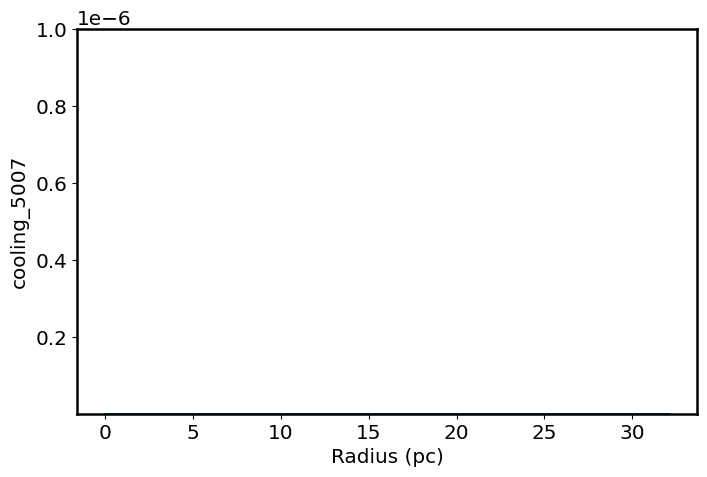

In [113]:
simname = 'Bubble_v2_1e-8'
with fits.open('/home/amrita/LVM/lvmnebular/'+simname+'/testneb_tutorial3_ex1.fits') as hdu:
        vals=hdu['Comp_0_PhysParams'].data

        e_5007 = hdu['COMP_0_FLUX_5006.84'].data
        #print(np.mean(e_5007), np.max(e_5007), np.min(e_5007), e_5007.shape)

#line = np.array([9532, 9069, 7319, 7320, 7330, 7331, 6731, 6716, 6584, 6548, 6312, 5755, 5007, 4959, 4363, 4069, 4076,  3729, 3726])
#em_line = np.array([138, 132, 101, 102,  103,  104,  96,   95,    93,   91,    89,  86,  72,  70,    45,   36,   37,   17,  16])
#
#for i, j in zip(line, em_line):
        cooling_func(5007, 72, np.max(vals[6]))

In [ ]:
hdul1.writeto('./Perturbation/lines_from_4Dcube.fits', overwrite=True)

for i, lines in enumerate(my_lvmfield.ism.nebulae_objects[0].wl_list):
    print(lines)

    simname = 'pert_0.248_0.05_Bubble_v2_1e-8'                                                    #simulation with perturbations


    e_lines = []

    with fits.open('/home/amrita/LVM/lvmnebular/'+simname+'/testneb_tutorial3_ex1.fits') as hdu:
            vals=hdu['Comp_0_PhysParams'].data

            e_lines.append(hdu['COMP_0_FLUX_'+str(lines)].data)
            
            print(np.mean(e_lines), np.max(e_lines), np.min(e_lines))
print(lines.shape)

3613.64
1.2512497363575456e-12 8.837342225705047e-12 -9.47778190870018e-16
3634.08
2.1734190403796363e-12 1.5781587014963333e-11 -1.5722862562234786e-17
3669.46
1.0705847813437584e-10 2.3176962351474463e-10 -2.213611888201639e-13
3671.47
1.9262540014116192e-11 4.173810797374743e-11 -1.6636885900015778e-14
3673.75
1.760423395452274e-11 3.836044202002942e-11 -8.014593681867062e-15
3676.36
1.8027403887967917e-11 3.947600903651679e-11 -9.912675991872221e-15
3679.35
1.9321087351849767e-11 4.250432854355739e-11 -1.5743125450418562e-14
3682.8
2.1243889812387633e-11 4.692978922636818e-11 -2.0551376761491505e-14
3686.83
2.3776538467805174e-11 5.271614592334305e-11 -2.1787989230889382e-14
3691.55
2.6996630499762425e-11 6.00367526823031e-11 -1.489322756870217e-14
3697.15
3.1063676179589696e-11 6.928664292565843e-11 -5.598663096676924e-15
3703.85
3.617358062305275e-11 8.085493915623911e-11 0.0
3704.76
3.1082797542786778e-12 2.2540270733170665e-11 -1.8021187923429892e-17
3711.97
4.266213107157885e-

In [ ]:
hdul1.writeto('./Perturbation/lines_from_4Dcube.fits', overwrite=True)

for i, lines in enumerate(my_lvmfield.ism.nebulae_objects[0].wl_list):
    print(lines)

    simname = 'Bubble_v2_1e-8'                                               #simulation without perturbations

    e_lines = []

    with fits.open('/home/amrita/LVM/lvmnebular/'+simname+'/testneb_tutorial3_ex1.fits') as hdu:
            vals=hdu['Comp_0_PhysParams'].data

            e_lines.append(hdu['COMP_0_FLUX_'+str(lines)].data)

            print(np.mean(e_lines), np.max(e_lines), np.min(e_lines))

3613.64
5.168950118959725e-12 1.6303748864705464e-11 0.0
3634.08
9.508033377660778e-12 2.9801366908009125e-11 0.0
3669.46
9.192811982857528e-11 2.2933213324682178e-10 0.0
3671.47
1.6471598448534048e-11 4.0873701191386666e-11 0.0
3673.75
1.5051323111985337e-11 3.7443200298435896e-11 0.0
3676.36
1.5431107669697642e-11 3.8481213664301733e-11 0.0
3679.35
1.6567222529951586e-11 4.144680007128706e-11 0.0
3682.8
1.8252470248919994e-11 4.5806006282632425e-11 0.0
3686.83
2.0471790061463782e-11 5.151779953564941e-11 0.0
3691.55
2.3293615374850233e-11 5.875874109901537e-11 0.0
3697.15
2.685975269097247e-11 6.790086950674308e-11 0.0
3703.85
3.135289488592154e-11 7.938167980244296e-11 0.0
3704.76
1.3663078158802547e-11 4.269084231059108e-11 0.0
3711.97
3.7069619600598744e-11 9.396256139284409e-11 0.0
3721.63
4.273334357857085e-12 8.947471731778804e-12 0.0
3721.93
4.443305935001189e-11 1.1270301049883233e-10 0.0
3726.03
1.0052729130614218e-09 2.0077213860503407e-09 0.0
3728.81
1.3501563937926933e-09

In [ ]:
simname = 'Bubble_v2_5e-14'

with fits.open('/home/amrita/LVM/lvmnebular/'+simname+'/testneb_tutorial3_ex1.fits') as hdu:
    vals=hdu['Comp_0_PhysParams'].data


with fits.open('./Perturbation/cube_4D_cart.fits') as hdul:
     data=hdul[0].data
     header = hdul[0].header


x1max = np.max(my_lvmfield.ism.nebulae_objects[0]._cartesian_x_grid)
y1max = np.max(my_lvmfield.ism.nebulae_objects[0]._cartesian_y_grid)
z1max = np.max(my_lvmfield.ism.nebulae_objects[0]._cartesian_z_grid)

print(data[72, :, np.min(y1max/2), np.min(z1max/2)])


line = 3726
chi = 6.626e-24*299792458*1e7/line

cooling_results = []  
for i, j in enumerate(rad):
    i = int(i)
    cooling_value = data[16, i, i, i] * chi / np.mean(vals[5])
    cooling_results.append((i, cooling_value))

print(cooling_results)

hdu=fits.PrimaryHDU(data = cooling_results, header = header)
hdu.writeto('./Perturbation/cooling_cube_OIII.fits', overwrite='True')

i_values, cooling_values = zip(*cooling_results)

# Create a plot
plt.plot(i_values, np.log10(cooling_values))

# Add labels and title
plt.xlabel('Pixels')
plt.ylabel('Log(Cooling_'+str(line)+')')
plt.title('Cooling_'+str(line)+'_vs. pixels')
plt.xlim(0, 50)
# Show the plot
plt.show()

[ERROR]: Traceback (most recent call last):
  File "/home/amrita/miniconda3/envs/lvmdatasimulator/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_9853/1146155935.py", line 16, in <module>
    print(data[72, :, np.min(y1max/2), np.min(z1max/2)])
IndexError: arrays used as indices must be of integer (or boolean) type

